# Customer Analysis 

### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business objectives
Retain customers, analyze relevant customer data, develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# EDA

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Load the csv into the variable customer_df
customer_df = pd.read_csv (r'C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
# look at its main features
customer_df.info

<bound method DataFrame.info of      customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  ...  \
0     Bachelor    

In [6]:
# Check all columns for NaN values
customer_df.isna().sum().sum()

0

In [7]:
customer_df.duplicated().sum()

0

In [8]:
# Change effective to date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [9]:
# Check the data types of the columns
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## Numerical columns

Create a new dataframe using only the numerical data called numerical_df.

In [10]:
numerical_columns = customer_df.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [11]:
numerical_df = customer_df[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','total_claim_amount']]
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Define a function that differentiates between continuous and discrete variables. 
Hint: The number of unique values might be useful. 
    
Store continuous data into a continuous_df variable and do the same for discrete_df

In [12]:
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [13]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [14]:
# it looks like variables with 'nunique' >= 100 should be continuous variables
def get_continuous_df(numerical_df, threshold=100):
    continuous_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() > threshold]
    continuous_df = numerical_df[continuous_columns]
    return continuous_df
continuous_df = get_continuous_df(numerical_df)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [15]:
# to get the other discrete variables
def get_discrete_df(numerical_df, threshold=100):
    discrete_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() <= threshold]
    discrete_df = numerical_df[discrete_columns]
    return discrete_df
discrete_df = get_discrete_df(numerical_df)
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


## Visualization of distributions of the numerical data

Plot a correlation matrix, comment what you see.

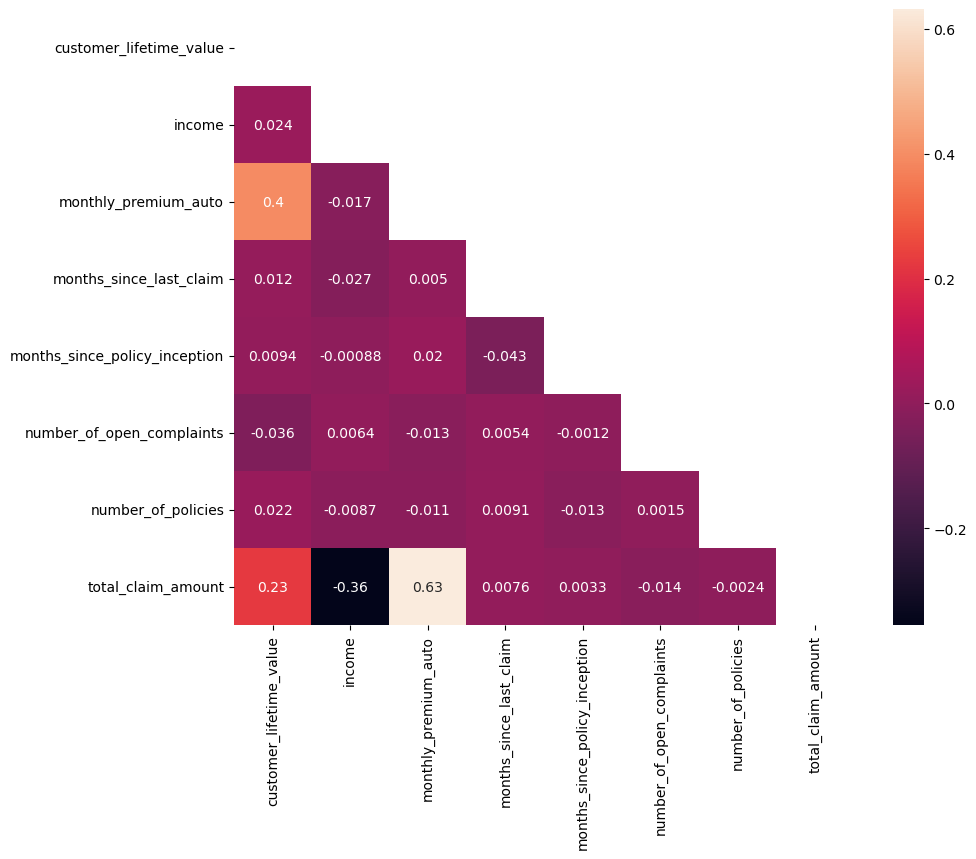

In [16]:
correlations_matrix = numerical_df.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

# Although there aren't any very strong correlations, 'total claim amount' have some median and low correlations.
# 'monthly premium auto' also has a median correlation with 'customer lifetime value'

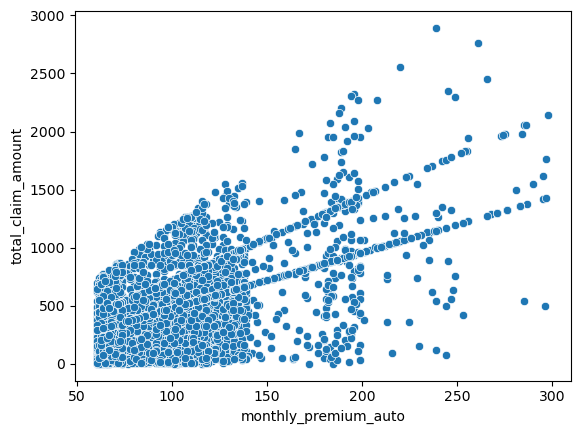

In [17]:
sns.scatterplot(x = numerical_df['monthly_premium_auto'], y = numerical_df['total_claim_amount'])
plt.show()

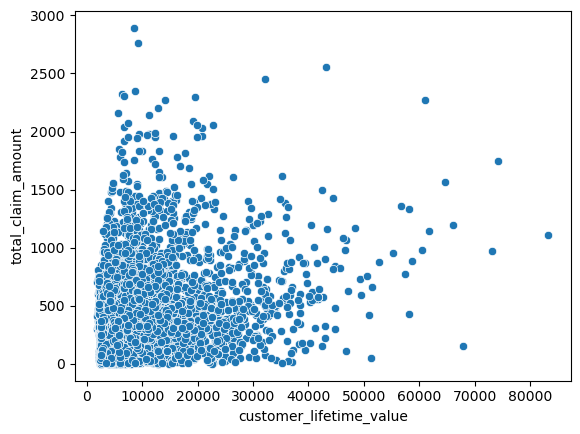

In [18]:
sns.scatterplot(x = numerical_df['customer_lifetime_value'], y = numerical_df['total_claim_amount'])
plt.show()

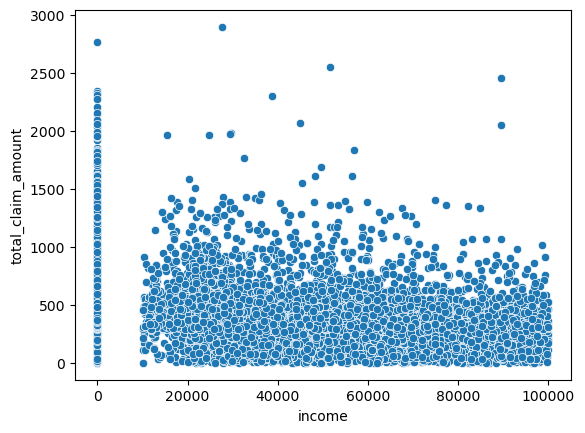

In [19]:
sns.scatterplot(x = numerical_df['income'], y = numerical_df['total_claim_amount'])
plt.show()

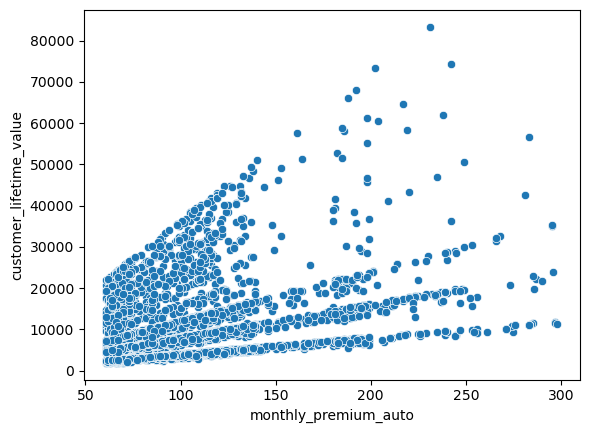

In [20]:
sns.scatterplot(x = numerical_df['monthly_premium_auto'], y = numerical_df['customer_lifetime_value'])
plt.show()

Create a function to plot every discrete variable. 

Comment what you can see in the plots.

In [21]:
# By looking at the histograms related to the discrete variables, 
# we can see that the distributions of months (since last clain, and since policy inception) are quite irregular
# Number of open complaints has a high count at 0, which is positive
# Number of policies has a high count at 1, and it would be better for the business if the count was higher for more policies

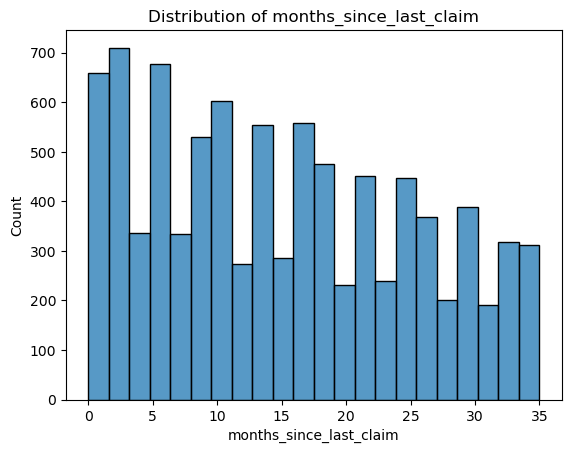

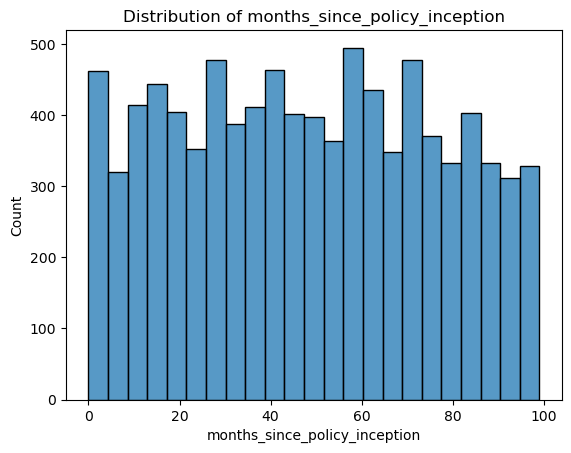

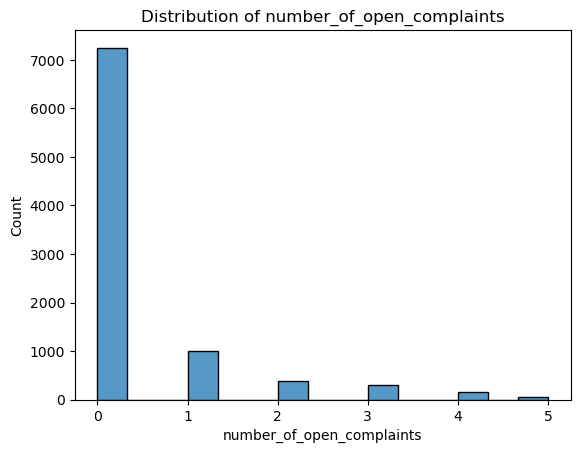

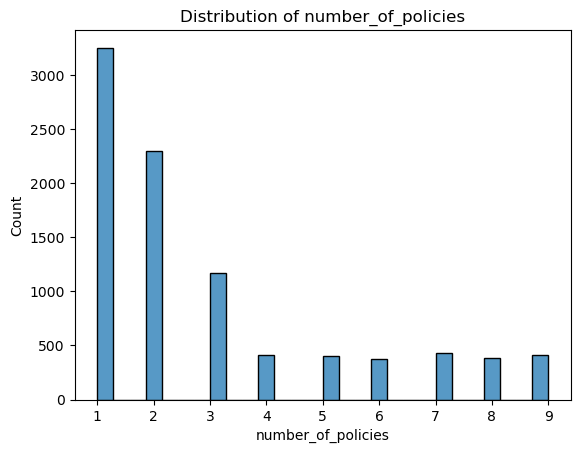

In [22]:
def plot_discrete_variables(numerical_df):
    discrete_columns = discrete_df.columns
    
    for column in discrete_columns:
        sns.histplot(discrete_df[column], bins='auto')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_discrete_variables(discrete_df)

Do the same with the continuous variables.

Comment what you can see in the plots.

Look for outliers in the continuous variables.

In [23]:
# By looking at both histograms and boxplots related to the continuous variables, 
# we can see that the distributions of values are quite irregular -
# in the boxplots we can see a high number of outliers.

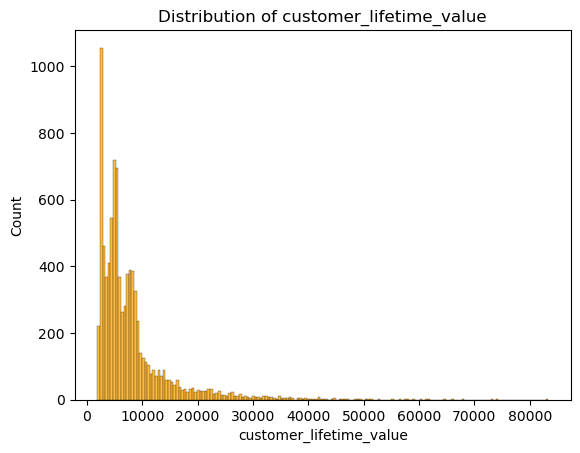

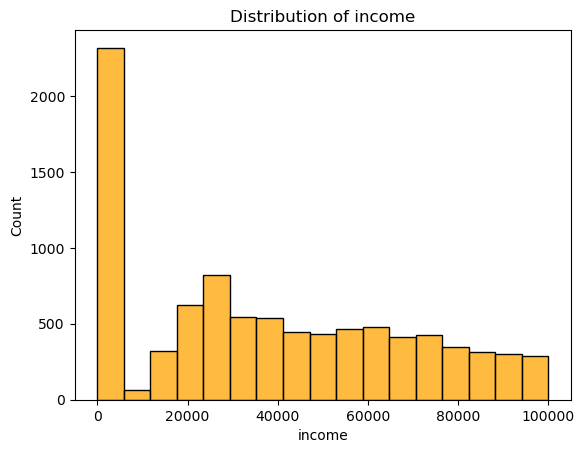

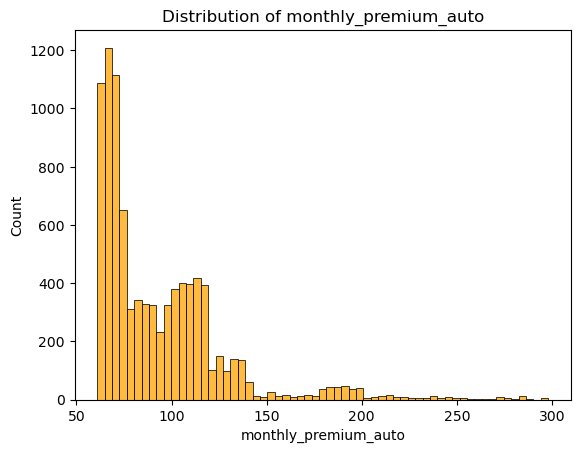

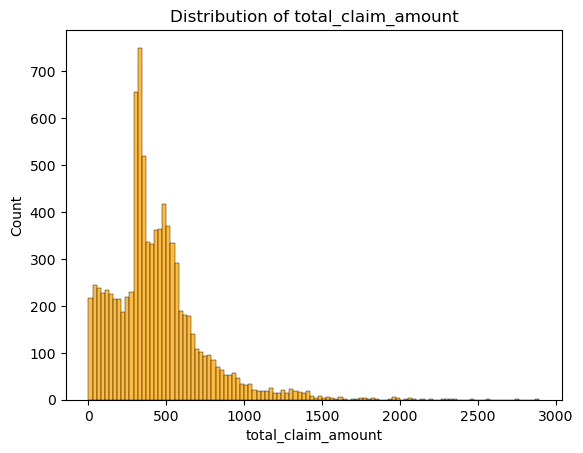

In [24]:
def plot_continuous_variables(numerical_df):
    continuous_columns = continuous_df.columns
    
    for column in continuous_columns:
        sns.histplot(continuous_df[column], bins='auto', color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_continuous_variables(continuous_df)

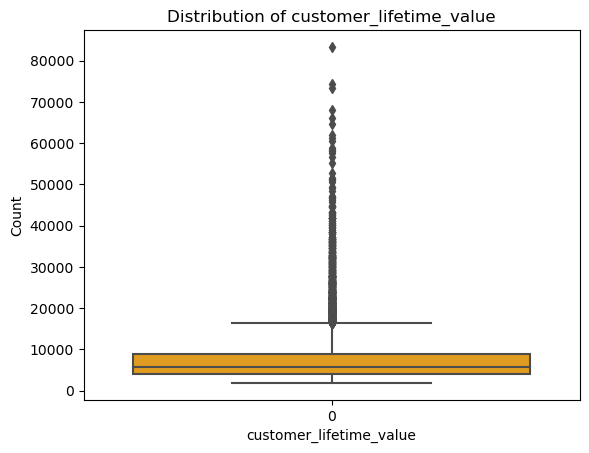

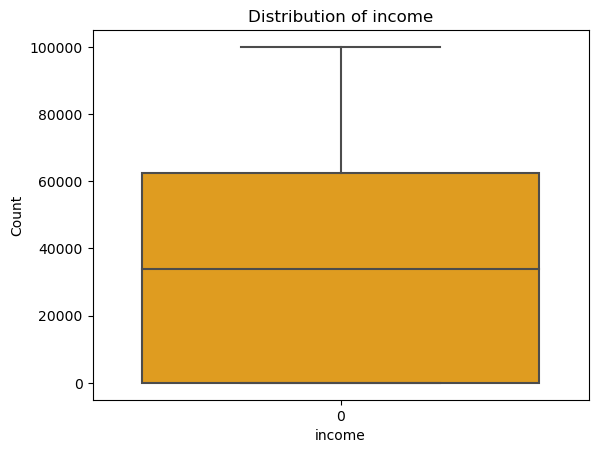

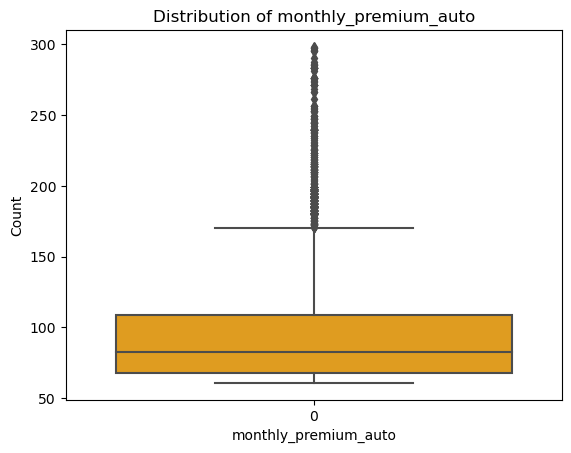

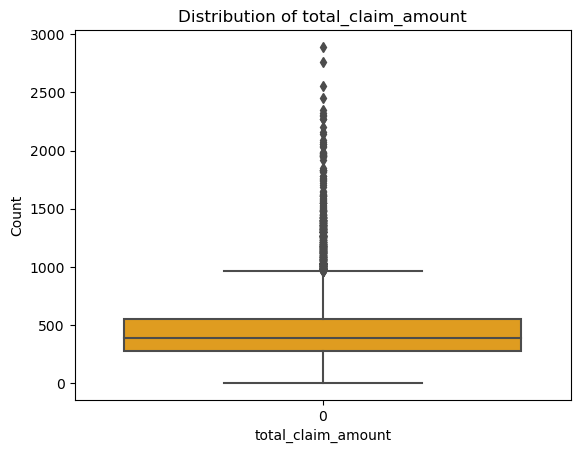

In [25]:
# Using boxplots
def plot_continuous_variables(numerical_df):
    continuous_columns = continuous_df.columns
    
    for column in continuous_columns:
        sns.boxplot(continuous_df[column], color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_continuous_variables(continuous_df)

### Final df

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [26]:
numerical_df.to_csv('numerical_df.csv')